In [19]:
from igraph import *
import networkx as nx
import random
import louvain
import os,sys
import time
import subprocess

In [5]:

def clique(g, size, idx, num_nodes):
  for i in range(idx,num_nodes-1):
    for j in range(idx - size,idx):
      g[i,j] = 0

In [6]:
def Print(g,num_nodes):
  G = nx.Graph()
  for i in range(num_nodes):
    G.add_node(i)
  for i in range(num_nodes):
    for j in range(i+1, num_nodes):
      if g[i,j] == 1:
        G.add_edge(i,j)
  nx.draw(G, with_labels=True)

In [7]:
def walktrap(g):
  k = g.community_walktrap()
  k = k.as_clustering()
  print(k)

In [8]:
def infomap(g):
  k = g.community_infomap()
  print(k)

In [9]:
def hub_node(clq):
    num_nodes = int((clq*(clq+1))/2) + 1
    g = Graph.Full(num_nodes)
    size = 0
    for i in range(clq,1,-1):
        size = size + i
        clique(g,i,size,num_nodes)
    walktrap(g)
    Print(g, num_nodes)
    infomap(g)

In [10]:
def hub_node2(clq):
    num_nodes = int(clq*(clq+1)) + 1
    g = Graph.Full(num_nodes)
    size = 0
    for i in range(clq,1,-1):
        size = size + i
        clique(g,i,size,num_nodes)
        size = size + i
        clique(g,i,size,num_nodes)
    g[num_nodes-2, num_nodes-3] = 0
    walktrap(g)
    Print(g, num_nodes)
    infomap(g)

In [11]:
def alt_hub_node(clq):
    num_nodes = int((clq+1)*(clq+1)/4) + 1
    g = Graph.Full(num_nodes)
    size = 0
    for i in range(clq,1,-2):
        size = size + i
        clique(g,i,size,num_nodes)
    walktrap(g)
    Print(g, num_nodes)
    infomap(g)

In [51]:
def creat_random_connected(offset,size,number_of_edges = 100000000):

    edges = []
    for i in range(size-1):
        edges.append((offset + i,offset + i + 1))
    edges.append((offset,offset + size - 1))
    ret_edges = edges;
    
    edges = []
    for i in range(size):
        for j in range(i + 1,size):
            if((offset + i,offset + j) not in ret_edges):
                edges.append((offset + i,offset + j))

    last = len(edges)-1
    for i in range(min(number_of_edges,len(edges))):
        ind = random.randint(0,last)
        ret_edges.append(edges[ind])
        last -= 1

    return ret_edges

In [52]:
def ring_of_clique(ring_size , clique_size):

    total_vert = ring_size*clique_size;

    edges = creat_random_connected(0,clique_size);import random

    offset = clique_size
    prev_connector = offset - 1

    for i in range(ring_size - 1):
        new_clique = creat_random_connected(offset,clique_size);
        new_clique.append((prev_connector,offset))
        edges.extend(new_clique)
        offset += clique_size
        prev_connector += clique_size

    edges.append((0,prev_connector))

    return [total_vert, edges]


In [53]:
def line_star_graph(total_vert, line_length):
    edges = []

    for i in range(1,line_length):
        edges.append((i-1,i))

    middle_node = line_length//2
    rem_vert = total_vert - line_length
    offset = line_length

    for i in range(rem_vert):
        edges.append((middle_node,offset + i))

    return [total_vert, edges]

In [56]:
def run_louvain(total_vert,edges):
                
    g = Graph()
    g.add_vertices(total_vert)
    g.add_edges(edges)
    
    Print(g,total_vert)
    
    part = louvain.find_partition(g, louvain.ModularityVertexPartition);
    print(part)

In [57]:
def run_maxperm(total_vert, edges):
    
    g = Graph()
    g.add_vertices(total_vert)
    g.add_edges(edges)
    
    input_file = open("input.dat", "w")
    input_file.write(str(total_vert) + " " + str(len(edges)) + "\n")
    for i in edges:
        m1 = i[0]
        m2 = i[1]
        input_file.write(str(m1) + " " + str(m2) + "\n")
    input_file.close()
    
    returned_value = subprocess.check_output("bash compile.sh", shell = True)
    returned_value = returned_value.decode("utf-8")
    
    print(returned_value)
    
    output_file = open("output.txt","r")
    partitions = output_file.readlines() 
    partitions = partitions[2:]
    
    sets = {}
    for i in partitions:
        str1 = i[:-1].split("\t")
        node = int(str1[0])
        community = int(str1[1])
        if(community in sets):
            sets[community].append(node)
        else:
            sets[community] = [node]
    
    for i in sets.keys():
        print (str(i) + " : "),
        print(sets[i])
    Print(g,total_vert)
    

-2147483647.000000
SumQ -0.333333 :: iter 1
SumQ 2.333333 :: iter 2
SumQ 2.333333 :: iter 3
Our MaxPerm Implementation took 0.000030 seconds

1 :  [0, 1, 2, 3]


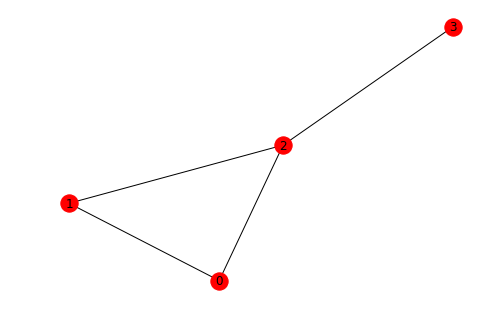

In [50]:
run_maxperm(4,[(0,1),(1,2),(2,3),(2,0)])

Clustering with 4 elements and 2 clusters
[0] 0, 1
[1] 2, 3


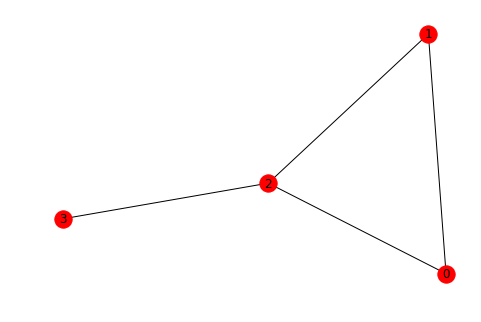

In [58]:
run_louvain(4,[(0,1),(1,2),(2,3),(2,0)])

-2147483647.000000
SumQ -4.489130 :: iter 1
SumQ -2.021739 :: iter 2
SumQ -2.021739 :: iter 3
Our MaxPerm Implementation took 0.033522 seconds

1 :  [0, 1, 2, 3, 4]
10 :  [5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
9 :  [8, 9]
7 :  [6, 7]


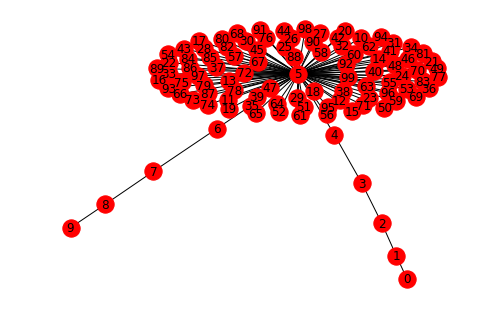

In [60]:
graph_1 = line_star_graph(100,10)
run_maxperm(graph_1[0],graph_1[1])